# Tookotaki assignment Problem

In [195]:
#Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import datetime
%matplotlib inline

In [2]:
#Load the raw_data train and test
raw_data_train = pd.read_csv("C:\\Users\\bhara\\Desktop\\tookitaki\\test data\\test data\\raw_data_70_new.csv")
raw_data_test = pd.read_csv("C:\\Users\\bhara\\Desktop\\tookitaki\\test data\\test data\\raw_data_30_new.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (12,20,63) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data_train.head(2)

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0


In [4]:
# .info() gives us the following information.
#number of samples(rows), number of attributes(columns).
#The data type of each attribute.
raw_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
dt_opened      23896 non-null object
customer_no    23896 non-null int64
entry_time     23881 non-null object
feature_1      23881 non-null object
feature_2      21060 non-null object
feature_3      21060 non-null float64
feature_4      23881 non-null float64
feature_5      23881 non-null object
feature_6      23881 non-null float64
feature_7      23881 non-null float64
feature_8      1261 non-null object
feature_9      1261 non-null object
feature_10     51 non-null object
feature_11     23881 non-null object
feature_12     23881 non-null object
feature_13     10892 non-null object
feature_14     16163 non-null float64
feature_15     23873 non-null object
feature_16     23869 non-null object
feature_17     1027 non-null object
feature_18     18 non-null object
feature_19     23881 non-null float64
feature_20     23896 non-null object
feature_21     23881 non-null object
feature





        The above info tells us the size of the data   23896 X 83

# Target Variable

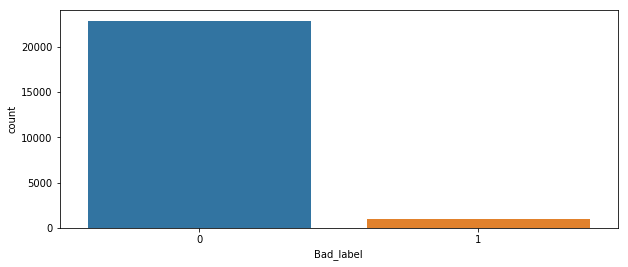

In [5]:
#The target variable in raw_data is "Bad_label" .Lets plot a count plot for our target variable.
plt.subplots(figsize=(10,4))
sns.countplot(raw_data_train.Bad_label)

                 Target variable is a two class problem.
                 --> 0 represents the good credit history of the customer.
                 --> 1 represents the bad credit history of the customer.

# Missing values imputation

In [6]:
#First lets check null values..
raw_data_train.isnull().sum().sort_values(ascending =False)

feature_61     23887
feature_74     23879
feature_18     23878
feature_10     23845
feature_49     23792
feature_17     22869
feature_8      22635
feature_9      22635
feature_57     21503
feature_73     20951
feature_48     18399
feature_45     13713
feature_13     13004
feature_53     11610
feature_51     11422
feature_14      7733
feature_38      5682
feature_37      5682
feature_36      5682
feature_27      3637
feature_3       2836
feature_2       2836
feature_24       640
feature_46        94
feature_16        27
feature_15        23
feature_30        15
feature_29        15
feature_31        15
feature_32        15
               ...  
feature_70        15
feature_69        15
feature_68        15
feature_67        15
feature_66        15
feature_65        15
feature_64        15
feature_63        15
feature_62        15
feature_60        15
feature_59        15
feature_58        15
feature_56        15
feature_55        15
feature_54        15
feature_52        15
feature_50   

      ufff.. There are soo many null values. why god..!?
               First lets separate numaric and categorical for our better understanding.So lets dive in...

In [7]:
#Feature_74 and Feature_49 are having more than 95% of null values so we will remove them.
#and others too
#customer no gives no info so drope it off..
rdt = raw_data_train.drop(["customer_no","feature_61", "feature_74", "feature_18", "feature_10", "feature_49", "feature_17", "feature_8", "feature_9", "feature_57", "feature_73", "feature_48", "feature_45", "feature_13", "feature_53", "feature_51"],axis =1)

In [8]:
rdt_num = rdt._get_numeric_data()
rdt_cat = rdt.drop(rdt_num.columns,axis = 1)

In [9]:
rdt_num.isnull().sum().sort_values(ascending= False)

feature_14    7733
feature_3     2836
feature_40      15
feature_4       15
feature_6       15
feature_7       15
feature_19      15
feature_25      15
feature_26      15
feature_29      15
feature_30      15
feature_31      15
feature_34      15
feature_35      15
feature_39      15
feature_41      15
feature_78      15
feature_42      15
feature_44      15
feature_52      15
feature_55      15
feature_56      15
feature_64      15
feature_65      15
feature_66      15
feature_67      15
feature_68      15
feature_69      15
feature_71      15
feature_76      15
Bad_label        0
dtype: int64

Before filling null values lets remove outliers


# Outliers detection

Outliers can be removed in two ways one with user defined quantiles functions and other with boxplot.

In [10]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

rdt_num.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
feature_3,21060.0,2836.0,1.523135e+07,723.235945,721.0,37.318684,1.392684e+03,-1.0,654.0,676.0,682.0,698.0,721.0,745.0,769.0,784.0,824.0,896.0
feature_4,23881.0,15.0,5.544200e+04,2.321595,3.0,0.892838,7.971589e-01,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
feature_6,23881.0,15.0,3.343340e+05,14.000000,14.0,0.000000,0.000000e+00,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
feature_7,23881.0,15.0,2.843523e+09,119070.503748,104000.0,77523.485085,6.009891e+09,0.0,30000.0,35000.0,50000.0,72000.0,104000.0,139000.0,192000.0,260000.0,442000.0,1217000.0
feature_14,16163.0,7733.0,1.307040e+05,8.086618,12.0,5.625654,3.164799e+01,0.0,0.0,0.0,0.0,0.0,12.0,12.0,12.0,12.0,12.0,12.0
feature_19,23881.0,15.0,2.506100e+04,1.049412,1.0,0.216731,4.697212e-02,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
feature_25,23881.0,15.0,2.946700e+04,1.233910,1.0,0.423324,1.792035e-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
feature_26,23881.0,15.0,1.732900e+04,0.725640,0.0,1.124986,1.265594e+00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3.0,4.0,10.0
feature_29,23881.0,15.0,5.196989e+09,217620.229346,110094.0,159267.102213,2.536601e+10,110001.0,110005.0,110015.0,110025.0,110051.0,110094.0,390002.0,500044.0,500090.0,600082.0,712245.0
feature_30,23881.0,15.0,4.779028e+07,2001.183996,2005.0,11.993426,1.438423e+02,1964.0,1968.8,1979.0,1983.0,1991.0,2005.0,2011.0,2013.0,2014.0,2015.0,2015.0


Using Box plot also we can remove outliers

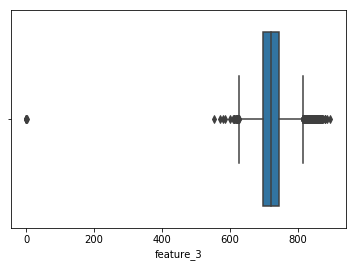

In [11]:
sns.boxplot(raw_data_train['feature_3'])

In [12]:
rdt_num['feature_3']= rdt_num['feature_3'].clip_lower(rdt_num['feature_3'].quantile(0.01))

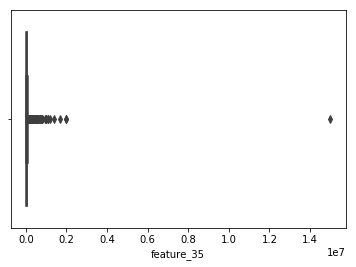

In [13]:
sns.boxplot(raw_data_train['feature_35'])

In [14]:
rdt_num['feature_35']= rdt_num['feature_35'].clip_upper(rdt_num['feature_35'].quantile(0.99))

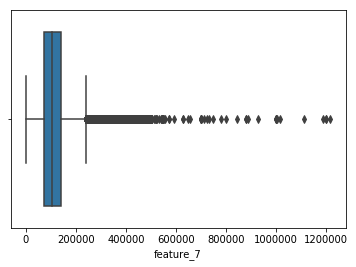

In [15]:
sns.boxplot(raw_data_train['feature_7'])

In [16]:
rdt_num['feature_7']= rdt_num['feature_7'].clip_upper(rdt_num['feature_7'].quantile(0.99))

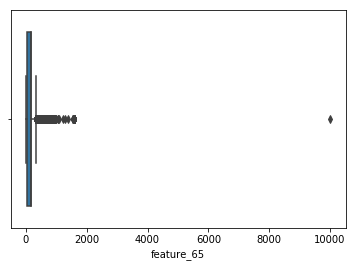

In [17]:
sns.boxplot(raw_data_train['feature_65'])

In [18]:
rdt_num['feature_65']= rdt_num['feature_65'].clip_upper(rdt_num['feature_65'].quantile(0.99))

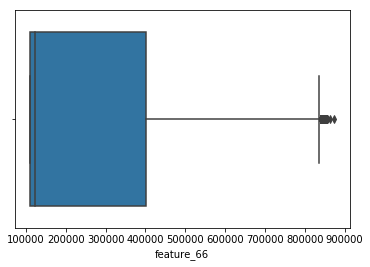

In [19]:
sns.boxplot(raw_data_train['feature_66'])

In [20]:
rdt_num['feature_66']= rdt_num['feature_66'].clip_upper(rdt_num['feature_66'].quantile(0.99))

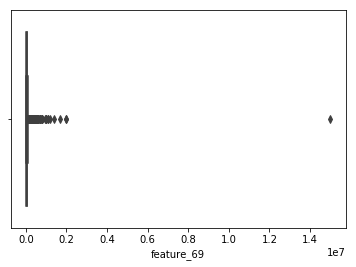

In [21]:
sns.boxplot(raw_data_train['feature_69'])

In [22]:
rdt_num['feature_69']= rdt_num['feature_69'].clip_upper(rdt_num['feature_69'].quantile(0.99))

In [23]:
rdt_num.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_3,21060.0,723.572697,34.643249,654.0,698.0,721.0,745.0,896.0
feature_4,23881.0,2.321595,0.892838,1.0,1.0,3.0,3.0,3.0
feature_6,23881.0,14.000000,0.000000,14.0,14.0,14.0,14.0,14.0
feature_7,23881.0,118092.822746,71265.846987,0.0,72000.0,104000.0,139000.0,442000.0
feature_14,16163.0,8.086618,5.625654,0.0,0.0,12.0,12.0,12.0
feature_19,23881.0,1.049412,0.216731,1.0,1.0,1.0,1.0,2.0
feature_25,23881.0,1.233910,0.423324,1.0,1.0,1.0,1.0,2.0
feature_26,23881.0,0.725640,1.124986,0.0,0.0,0.0,2.0,10.0
feature_29,23881.0,217620.229346,159267.102213,110001.0,110051.0,110094.0,390002.0,712245.0
feature_30,23881.0,2001.183996,11.993426,1964.0,1991.0,2005.0,2011.0,2015.0


In [24]:
#Now lets fill all the rdt_num with mean..
rdt_num["feature_14"] = rdt_num["feature_14"].fillna(12.0)
rdt_num['feature_3']=rdt_num['feature_3'].fillna(rdt_num['feature_3'].mean())
rdt_num['feature_30']=rdt_num['feature_30'].fillna(rdt_num['feature_30'].median())
rdt_num['feature_39']=rdt_num['feature_39'].fillna(0.0)
rdt_num['feature_35']=rdt_num['feature_35'].fillna(rdt_num['feature_35'].mean())
rdt_num['feature_34']=rdt_num['feature_34'].fillna(1.0)
rdt_num['feature_31']=rdt_num['feature_31'].fillna(0.0)
rdt_num['feature_40']=rdt_num['feature_40'].fillna(0.0)
rdt_num['feature_41']=rdt_num['feature_41'].fillna(0.0)
rdt_num['feature_29']=rdt_num['feature_29'].fillna(rdt_num['feature_29'].mean())
rdt_num['feature_25']=rdt_num['feature_25'].fillna(1.0)
rdt_num['feature_19']=rdt_num['feature_19'].fillna(1.0)
rdt_num['feature_7']=rdt_num['feature_7'].fillna(rdt_num['feature_7'].mean())
rdt_num['feature_6']=rdt_num['feature_6'].fillna(14.0)
rdt_num['feature_26']=rdt_num['feature_26'].fillna(0.0)
rdt_num['feature_42']=rdt_num['feature_42'].fillna(0.0)
rdt_num['feature_78']=rdt_num['feature_78'].fillna(1.0)
rdt_num['feature_44']=rdt_num['feature_44'].fillna(rdt_num['feature_44'].mean())
rdt_num['feature_52']=rdt_num['feature_52'].fillna(0.0)
rdt_num['feature_55']=rdt_num['feature_55'].fillna(1.0)
rdt_num['feature_56']=rdt_num['feature_56'].fillna(10.0)
rdt_num['feature_64']=rdt_num['feature_64'].fillna(10.0)
rdt_num['feature_65']=rdt_num['feature_65'].fillna(rdt_num['feature_65'].mean())
rdt_num['feature_66']=rdt_num['feature_66'].fillna(rdt_num['feature_66'].mean())
rdt_num['feature_67']=rdt_num['feature_67'].fillna(0.0)
rdt_num['feature_68']=rdt_num['feature_68'].fillna(1.0)
rdt_num['feature_69']=rdt_num['feature_69'].fillna(rdt_num['feature_69'].mean())
rdt_num['feature_71']=rdt_num['feature_71'].fillna(10.0)
rdt_num['feature_76']=rdt_num['feature_76'].fillna(0.0)
rdt_num['feature_4']=rdt_num['feature_4'].fillna(3.0)

since these are dates fill it with mode and chenge the dtype also..

In [25]:
#feature_30,feature_39 are dates so lets convert them to object..
rdt_num['feature_30']=rdt_num['feature_30'].astype('object')
rdt_num['feature_39']=rdt_num['feature_39'].astype('object')

In [26]:
#lets check for null values before moving further..
rdt_num.isnull().sum().any()

False

so there are no null values and we imupted null values with central tendencies succesfully

In [27]:
rdt_num.columns

Index(['feature_3', 'feature_4', 'feature_6', 'feature_7', 'feature_14',
       'feature_19', 'feature_25', 'feature_26', 'feature_29', 'feature_30',
       'feature_31', 'feature_34', 'feature_35', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_44', 'feature_52', 'feature_55',
       'feature_56', 'feature_64', 'feature_65', 'feature_66', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_76', 'feature_78',
       'Bad_label'],
      dtype='object')

# Now it's time to deal with  categorical attributes

In [28]:
#Lets check null values categorical attributes and fill them accordingly
rdt_cat.isnull().sum().sort_values(ascending = False)

feature_36    5682
feature_37    5682
feature_38    5682
feature_27    3637
feature_2     2836
feature_24     640
feature_46      94
feature_16      27
feature_15      23
feature_23      15
feature_79      15
feature_21      15
feature_32      15
feature_12      15
feature_11      15
feature_5       15
feature_1       15
entry_time      15
feature_28      15
feature_33      15
feature_43      15
feature_50      15
feature_54      15
feature_58      15
feature_59      15
feature_60      15
feature_62      15
feature_63      15
feature_70      15
feature_72      15
feature_75      15
feature_77       0
feature_47       0
feature_22       0
feature_20       0
dt_opened        0
dtype: int64

In [29]:
rdt_cat.describe().T

,count,unique,top,freq
dt_opened,23896,197,16-Nov-15,699
entry_time,23881,296,19-Oct-15,180
feature_1,23881,7,Platinum Maxima,9056
feature_2,21060,281,19-Oct-15,182
feature_5,23881,1,Card Setup,23881
feature_11,23881,2,Y,22611
feature_12,23881,16,PM1,8853
feature_15,23873,364,SA03,9331
feature_16,23869,522,AS19,1374
feature_20,23896,10610,AXMPKXXXXX,16


In [30]:
#Filling categorical with mode..
#some are filled with others because no info is provided
rdt_cat["feature_36"] = rdt_cat["feature_36"].fillna("Others")
rdt_cat["feature_37"] = rdt_cat["feature_37"].fillna("Others")
rdt_cat["feature_38"] = rdt_cat["feature_38"].fillna("Others")
rdt_cat["feature_27"] = rdt_cat["feature_27"].fillna("Others")
rdt_cat["feature_2"] = rdt_cat["feature_2"].fillna("23-Dec-17")
rdt_cat["feature_24"] = rdt_cat["feature_24"].fillna("@GMAIL.COM")
rdt_cat["feature_46"] = rdt_cat["feature_46"].fillna("PAN Card")
rdt_cat["feature_16"] = rdt_cat["feature_16"].fillna("AS19")
rdt_cat["feature_15"] = rdt_cat["feature_15"].fillna("SA03")
rdt_cat["feature_23"] = rdt_cat["feature_23"].fillna("N")
rdt_cat["feature_79"] = rdt_cat["feature_79"].fillna("N")
rdt_cat["feature_21"] = rdt_cat["feature_21"].fillna("1-Jan-85")
rdt_cat["feature_32"] = rdt_cat["feature_32"].fillna("Self")
rdt_cat["feature_12"] = rdt_cat["feature_12"].fillna("PM1")
rdt_cat["feature_11"] = rdt_cat["feature_11"].fillna("Y")
rdt_cat["feature_5"] = rdt_cat["feature_5"].fillna("Card Setup")
rdt_cat["feature_1"] = rdt_cat["feature_1"].fillna("Platinum Maxim1")
rdt_cat["entry_time"] = rdt_cat["entry_time"].fillna("19-Oct-15")
rdt_cat["feature_28"] = rdt_cat["feature_28"].fillna("New Delhi")
rdt_cat["feature_33"] = rdt_cat["feature_33"].fillna("Y")
rdt_cat["feature_43"] = rdt_cat["feature_43"].fillna("New Delhi")
rdt_cat["feature_50"] = rdt_cat["feature_50"].fillna("Y")
rdt_cat["feature_54"] = rdt_cat["feature_54"].fillna("17-Jun-16")
rdt_cat["feature_58"] = rdt_cat["feature_58"].fillna("Y")
rdt_cat["feature_59"] = rdt_cat["feature_59"].fillna("Y")
rdt_cat["feature_60"] = rdt_cat["feature_60"].fillna("Y")
rdt_cat["feature_62"] = rdt_cat["feature_62"].fillna("Y")
rdt_cat["feature_63"] = rdt_cat["feature_63"].fillna("2010-0")
rdt_cat["feature_70"] = rdt_cat["feature_70"].fillna("0-0")
rdt_cat["feature_72"] = rdt_cat["feature_72"].fillna("R")
rdt_cat["feature_75"] = rdt_cat["feature_75"].fillna("0000-00-00")

Good there are no null values now

In [31]:
#Lets concat numaric and categorical attributes..
rdt_train = pd.concat([rdt_num,rdt_cat],axis=1)

In [32]:
#checking wether still null values present or not
rdt_train.isnull().sum().any()

False

In [82]:
rdt_final1 = rdt_num.drop(['feature_6', 'feature_30', 'feature_39'],axis =1);
                         

In [83]:
rdt_final1.columns

Index(['feature_3', 'feature_4', 'feature_7', 'feature_14', 'feature_19',
       'feature_25', 'feature_26', 'feature_29', 'feature_31', 'feature_34',
       'feature_35', 'feature_40', 'feature_41', 'feature_42', 'feature_44',
       'feature_52', 'feature_55', 'feature_56', 'feature_64', 'feature_65',
       'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_71',
       'feature_76', 'feature_78', 'Bad_label'],
      dtype='object')

In [84]:
rdt_cat.columns

Index(['dt_opened', 'entry_time', 'feature_1', 'feature_2', 'feature_5',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37',
       'feature_38', 'feature_43', 'feature_46', 'feature_47', 'feature_50',
       'feature_54', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_63', 'feature_70', 'feature_72', 'feature_75', 'feature_77',
       'feature_79'],
      dtype='object')

In [121]:
rdt_cat.feature_79.value_counts()

N    23891
Y        5
Name: feature_79, dtype: int64

In [33]:
rdt_cat.columns

Index(['dt_opened', 'entry_time', 'feature_1', 'feature_2', 'feature_5',
       'feature_11', 'feature_12', 'feature_15', 'feature_16', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_27',
       'feature_28', 'feature_32', 'feature_33', 'feature_36', 'feature_37',
       'feature_38', 'feature_43', 'feature_46', 'feature_47', 'feature_50',
       'feature_54', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_63', 'feature_70', 'feature_72', 'feature_75', 'feature_77',
       'feature_79'],
      dtype='object')

In [125]:
rdt_final2 = rdt_cat.drop(['dt_opened', 'entry_time', 'feature_2', 'feature_5', 'feature_15',
       'feature_16', 'feature_20', 'feature_21', 'feature_22', 'feature_24',
       'feature_28', 'feature_38', 'feature_43', 'feature_47', 'feature_54',
       'feature_63', 'feature_70', 'feature_75', 'feature_77'],axis = 1)

In [126]:
rdt_final2.columns

Index(['feature_1', 'feature_11', 'feature_12', 'feature_23', 'feature_27',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_46',
       'feature_50', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_72', 'feature_79'],
      dtype='object')

In [128]:
dum= pd.get_dummies(rdt_final2, columns=['feature_1', 'feature_11', 'feature_12', 'feature_23', 'feature_27',
       'feature_32', 'feature_33', 'feature_36', 'feature_37', 'feature_46',
       'feature_50', 'feature_58', 'feature_59', 'feature_60', 'feature_62',
       'feature_72', 'feature_79'],drop_first =True)

In [131]:
rdt_t =pd.concat([rdt_final1,dum],axis =1)

In [204]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(
        rdt_t.drop(["Bad_label"],axis =1),
        rdt_t.Bad_label,
        test_size=0.20,
        random_state=123)

# decision tree

In [133]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export 
from sklearn.grid_search import GridSearchCV

In [137]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeClassifier(max_depth = depth)
    dt_obj.fit(X_train,Y_train)
    print('depth:',depth , 'accuracy:', metrics.accuracy_score(Y_test, dt_obj.predict(X_test)))

depth: 1 accuracy: 0.958158995816
depth: 2 accuracy: 0.958158995816
depth: 3 accuracy: 0.958158995816
depth: 4 accuracy: 0.957949790795
depth: 5 accuracy: 0.957949790795
depth: 6 accuracy: 0.957531380753
depth: 7 accuracy: 0.955857740586
depth: 8 accuracy: 0.955230125523
depth: 9 accuracy: 0.954393305439
depth: 10 accuracy: 0.951464435146
depth: 11 accuracy: 0.952510460251
depth: 12 accuracy: 0.947907949791
depth: 13 accuracy: 0.944142259414
depth: 14 accuracy: 0.9410041841
depth: 15 accuracy: 0.938493723849
depth: 16 accuracy: 0.933682008368
depth: 17 accuracy: 0.930125523013
depth: 18 accuracy: 0.927615062762
depth: 19 accuracy: 0.920920502092


In [138]:
param_grid ={'max_depth': np.arange(3,10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)
tree.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [139]:
tree.best_params_

{'max_depth': 4}

In [140]:
tree.best_score_

0.9578886796400921

In [141]:
tree_final = DecisionTreeClassifier(max_depth=4)
tree_final.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
depth_list = list(range(1,10))
for depth in depth_list:
    tree1 = DecisionTreeClassifier(max_depth=depth)
    tree1.fit(X_train, Y_train)
    print ('tree depth:', depth, 'Accuracy:', metrics.accuracy_score(Y_test, tree1.predict(X_test)))

tree depth: 1 Accuracy: 0.958158995816
tree depth: 2 Accuracy: 0.958158995816
tree depth: 3 Accuracy: 0.958158995816
tree depth: 4 Accuracy: 0.957949790795
tree depth: 5 Accuracy: 0.958158995816
tree depth: 6 Accuracy: 0.957949790795
tree depth: 7 Accuracy: 0.955857740586
tree depth: 8 Accuracy: 0.955439330544
tree depth: 9 Accuracy: 0.953974895397


In [143]:
tree_test_pred = pd.DataFrame({'actual': Y_test, 'predicted': tree_final.predict(X_test)})

In [145]:
tree_test_pred.head()

,actual,predicted
10813,0,0
2473,0,0
16375,0,0
11888,0,0
2832,0,0


In [146]:
metrics.accuracy_score(tree_test_pred.actual, tree_test_pred.predicted)

0.95794979079497911

Text(0.5,14.0938,'Predicted label')

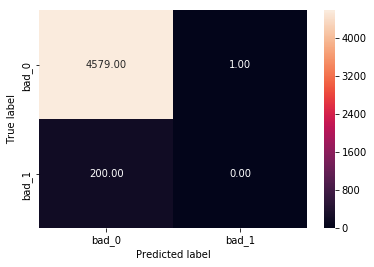

In [151]:
cm = metrics.confusion_matrix(Y_test,
                              tree_test_pred.predicted, [0,1])
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["bad_0",'bad_1'] , yticklabels =  ["bad_0","bad_1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

# PCA

In [152]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit( rdt_t.drop(["Bad_label"],axis =1))                
t_train = scaler.transform( rdt_t.drop(["Bad_label"],axis =1))

In [153]:
pca_har = PCA(0.99)
x_fit = pca_har.fit_transform(t_train)
print (t_train.shape, x_fit.shape)

(23896, 94) (23896, 73)


In [154]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_fit,rdt_t.Bad_label)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [191]:
X_train , X_test, Y_train, Y_test = train_test_split(
        x_fit,
        rdt_t.Bad_label,
        test_size=0.35,
        random_state=5)

In [192]:
y_pred = log.predict(X_test)

In [193]:
from sklearn import metrics
metrics.accuracy_score(Y_test, y_pred)

0.95743663318986127

Text(0.5,14.0938,'Predicted label')

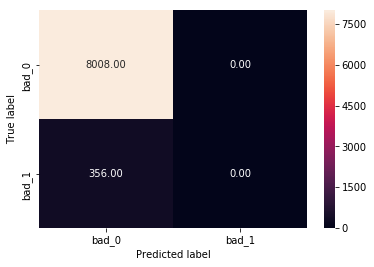

In [194]:
cm = metrics.confusion_matrix(Y_test,
                              y_pred, [0,1])
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["bad_0",'bad_1'] , yticklabels =  ["bad_0","bad_1"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Random Forest

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rad_clf = RandomForestClassifier(oob_score = True ,n_estimators =100)
rad_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [207]:
rad_test_pred = pd.DataFrame({'actual': Y_test ,
                             'predicted': rad_clf.predict( X_test ) } )

In [208]:
metrics.accuracy_score( rad_test_pred.actual, rad_test_pred.predicted )

0.95815899581589958

In [209]:
indices = np.argsort(rad_clf.feature_importances_)[::-1]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


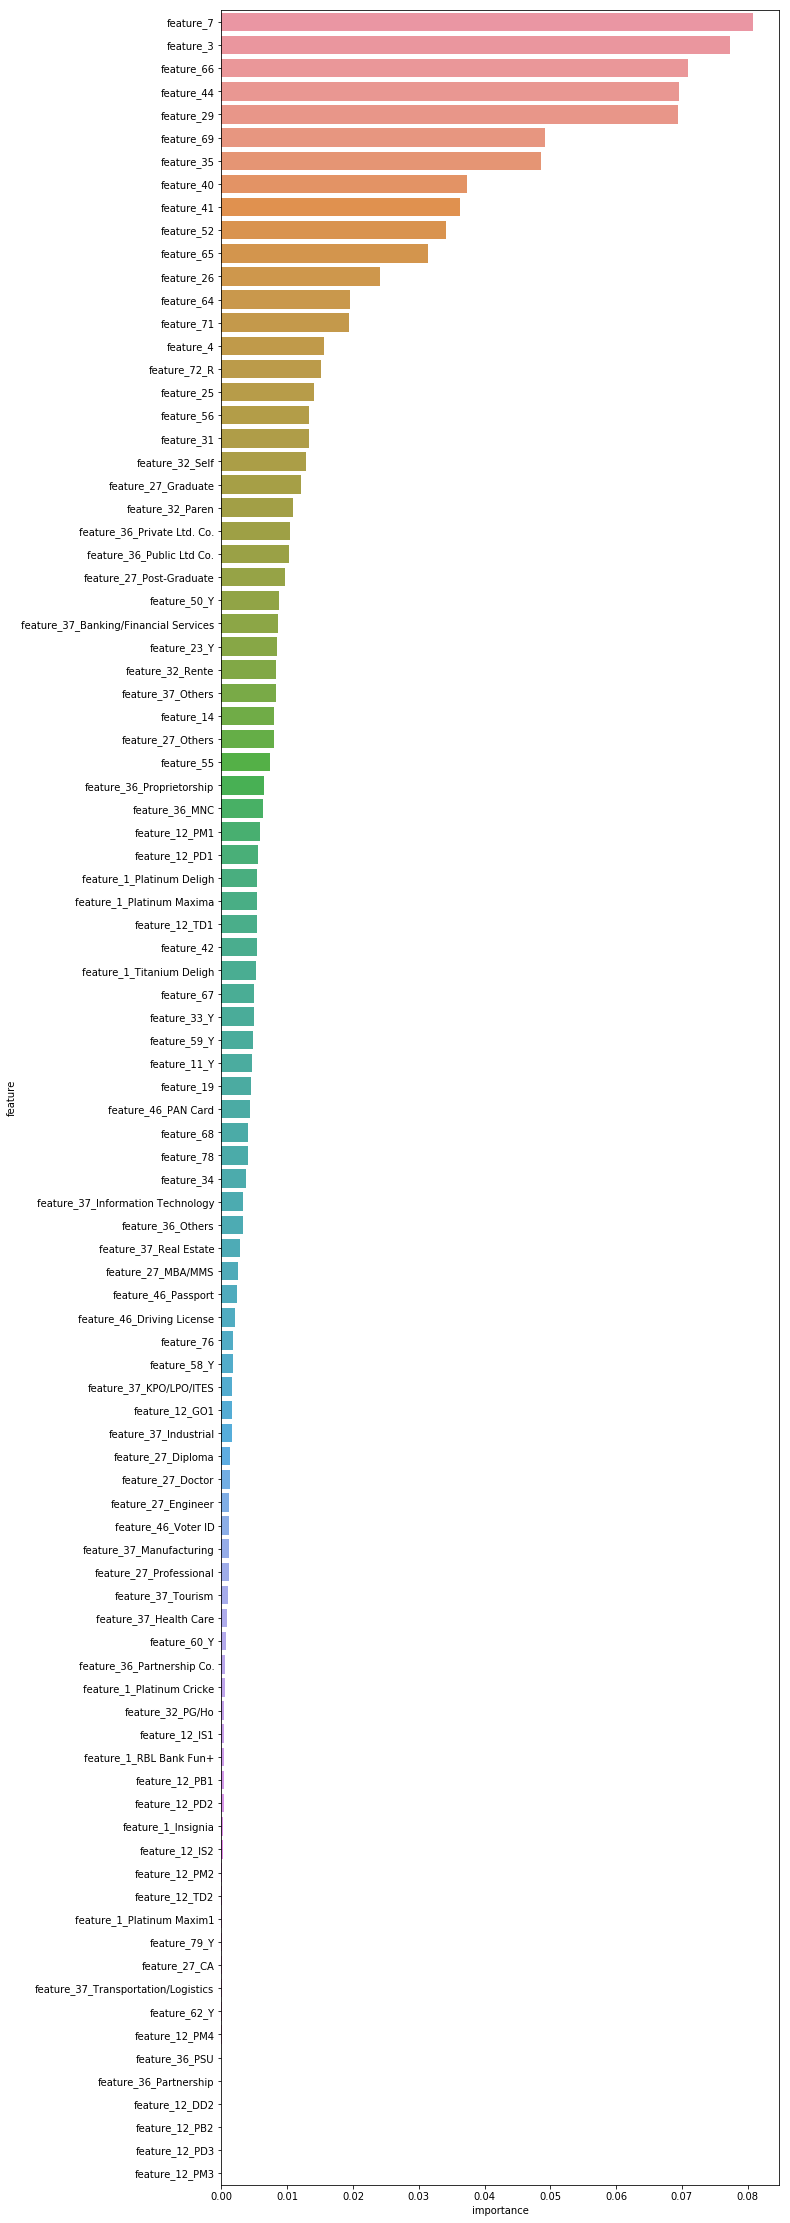

In [217]:
indices = np.argsort(rad_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rad_clf.feature_importances_[indices[f]]]
    
    
    import matplotlib.font_manager as fm

fontsize2use = 10

fig = plt.figure(figsize=(10,40))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)
ax = fig.add_subplot(111)
ax.set_xlabel('importance')
ax.set_ylabel('feature')

sns.barplot( y = 'feature', x = 'importance', data = feature_rank)
plt.show()

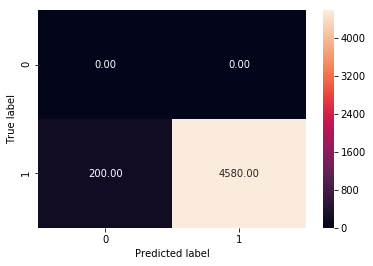

In [229]:
tree_cm = metrics.confusion_matrix(rad_test_pred.predicted ,rad_test_pred.actual,[1,0])
sns.heatmap(tree_cm, annot=True, fmt='.2f', 
            xticklabels= ['0','1'], yticklabels=['0','1'])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [234]:
rdt_num.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

# Unbalenced Problem

In [236]:
from sklearn.utils import resample

In [237]:
df_majority = rdt_t[rdt_t.Bad_label==0]
df_minority = rdt_t[rdt_t.Bad_label==1]

In [296]:
#upsample minority class 
df_minority_upsampled = resample(df_minority,
                                replace =True,   #sample with replacement
                                n_samples = 1004,  #To match majority class
                                random_state = 123)

In [297]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [298]:
df_upsampled.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

In [299]:
rdt_num.Bad_label.value_counts()

0    22892
1     1004
Name: Bad_label, dtype: int64

In [300]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23896 entries, 0 to 7347
Data columns (total 95 columns):
feature_3                                23896 non-null float64
feature_4                                23896 non-null float64
feature_7                                23896 non-null float64
feature_14                               23896 non-null float64
feature_19                               23896 non-null float64
feature_25                               23896 non-null float64
feature_26                               23896 non-null float64
feature_29                               23896 non-null float64
feature_31                               23896 non-null float64
feature_34                               23896 non-null float64
feature_35                               23896 non-null float64
feature_40                               23896 non-null float64
feature_41                               23896 non-null float64
feature_42                               23896 non-null floa

In [301]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(
        df_upsampled.drop(["Bad_label"],axis =1),
        df_upsampled.Bad_label,
        test_size=0.20,
        random_state=123)

# Random Forest

In [302]:
from sklearn.ensemble import RandomForestClassifier

In [303]:
rad_clf = RandomForestClassifier(oob_score = True ,n_estimators =100)
rad_clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [304]:
rad_test_pred = pd.DataFrame({'actual': Y_test ,
                             'predicted': rad_clf.predict( X_test ) } )

In [305]:
metrics.accuracy_score( rad_test_pred.actual, rad_test_pred.predicted )

0.98158995815899586

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


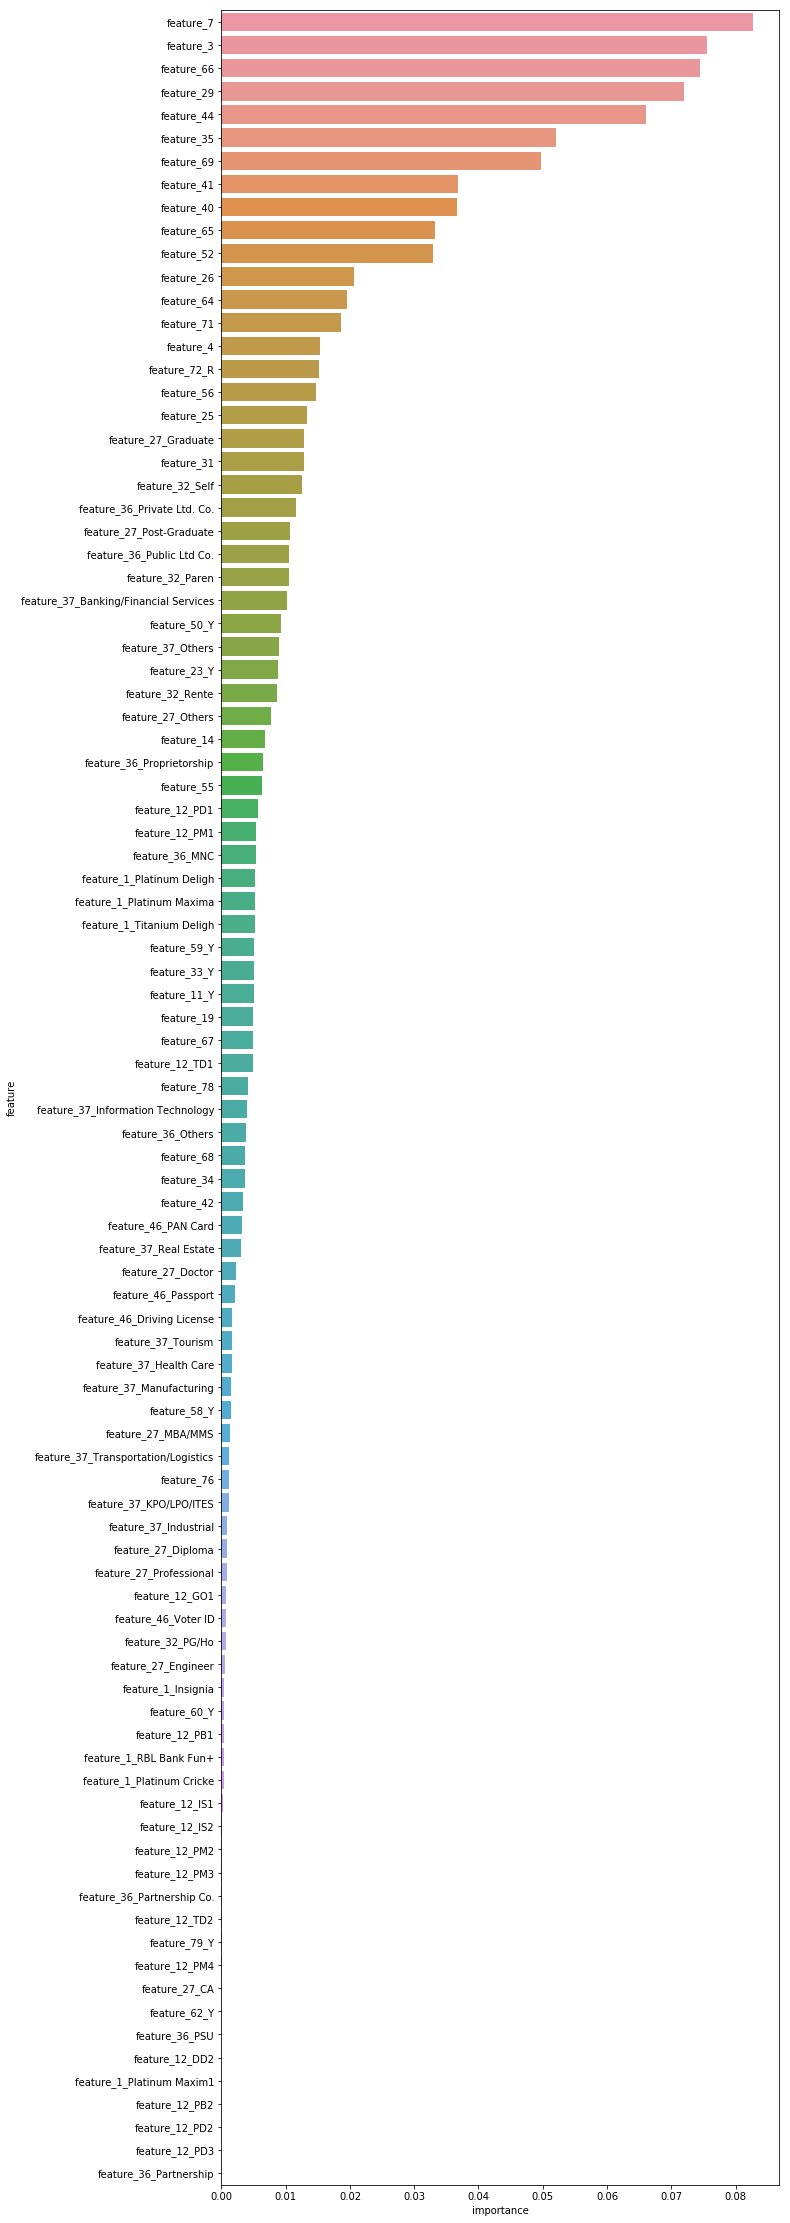

In [306]:
indices = np.argsort(rad_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
    feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rad_clf.feature_importances_[indices[f]]]
    
    
    import matplotlib.font_manager as fm

fontsize2use = 10

fig = plt.figure(figsize=(10,40))
plt.xticks(fontsize=fontsize2use)  
plt.yticks(fontsize=fontsize2use)    
fontprop = fm.FontProperties(size=fontsize2use)
ax = fig.add_subplot(111)
ax.set_xlabel('importance')
ax.set_ylabel('feature')

sns.barplot( y = 'feature', x = 'importance', data = feature_rank)
plt.show()

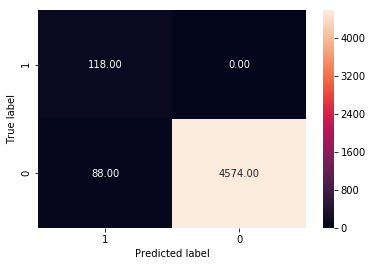

In [307]:
tree_cm = metrics.confusion_matrix(rad_test_pred.predicted ,rad_test_pred.actual,[1,0])
sns.heatmap(tree_cm, annot=True, fmt='.2f', 
            xticklabels= ['1','0'], yticklabels=['1','0'])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [309]:
raw_data_train.feature_54.head()

0    17-Jun-16
1    17-Jun-16
2    17-Jun-16
3    17-Jun-16
4    17-Jun-16
Name: feature_54, dtype: object

In [310]:
raw_data_train.feature_63

0         1965-0
1         1969-0
2         1966-0
3         1988-0
4         1995-0
5         2000-0
6         1964-0
7         1964-0
8         1977-0
9         1969-0
10        2007-0
11        2012-0
12        2000-0
13        1988-0
14        1978-0
15        1999-0
16        1990-0
17        2010-0
18        1995-0
19        2000-0
20        1964-0
21        2009-0
22        2000-0
23        1970-0
24        1964-0
25        1970-0
26        1975-0
27        1980-0
28        1981-0
29        1980-0
          ...   
23866     2001-0
23867     2010-0
23868     1992-0
23869     1990-0
23870     2014-0
23871     1986-0
23872     1978-0
23873     2010-0
23874     2008-0
23875     2011-0
23876     2014-0
23877     2009-0
23878     2014-0
23879     2005-0
23880     2013-0
23881     1990-0
23882     1995-0
23883     2006-1
23884     1992-1
23885     1988-0
23886     1975-0
23887    2008-12
23888     2013-0
23889     2014-0
23890     1992-0
23891    1988-10
23892    2014-12
23893     1986